In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [186]:
data = pd.read_csv("C:/Users/HP/Documents/Kuliah/Portofolio/Data.csv")

In [187]:
data.shape

(1083761, 33)

In [188]:
data

,id,income,email_similarity,address_months_count,current_address_months_count,age,days_request,initial_amount,payment,zip_count,...,credit_limit,foreign,source_of_application,session_length,os,keep_alive,distinct_device_emails,device_fraud,month_of_application,fraud
0,313601,0.8,0.728457,-1,80,40.0,0.004258,-1.080257,AC,834.0,...,1000.0,0.0,INTERNET,3.596101,windows,NaN,1.0,0.0,4.0,1
1,461778,0.5,0.858082,-1,272,30.0,0.018662,NaN,NaN,1296.0,...,1000.0,0.0,INTERNET,6.151814,other,0.0,1.0,0.0,NaN,0
2,262345,0.9,0.814606,-1,121,40.0,0.006578,-1.403771,NaN,1471.0,...,1000.0,0.0,INTERNET,4.135402,other,1.0,1.0,0.0,0.0,1
3,229088,0.8,0.730362,-1,40,20.0,0.016866,-1.225565,NaN,3281.0,...,200.0,0.0,INTERNET,3.394497,windows,0.0,1.0,0.0,0.0,0
4,559991,0.1,0.032931,-1,194,50.0,0.020789,NaN,AB,1493.0,...,990.0,0.0,INTERNET,4.737753,windows,1.0,1.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083756,156060,0.9,0.621686,-1,263,20.0,0.003981,-0.506858,AB,1065.0,...,1500.0,0.0,INTERNET,5.647597,windows,1.0,1.0,0.0,5.0,0
1083757,416819,0.3,0.203487,-1,119,30.0,NaN,-1.016709,NaN,1196.0,...,200.0,NaN,INTERNET,5.180051,linux,1.0,1.0,0.0,5.0,0
1083758,954737,0.9,0.118512,-1,134,50.0,0.021271,0.024437,AD,1216.0,...,500.0,0.0,INTERNET,3.182414,other,NaN,1.0,0.0,6.0,0
1083759,265897,0.1,0.909544,-1,144,30.0,0.005345,26.620659,AA,1159.0,...,1500.0,0.0,INTERNET,6.253071,NaN,0.0,1.0,0.0,2.0,0


In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083761 entries, 0 to 1083760
Data columns (total 33 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   id                            1083761 non-null  int64  
 1   income                        1006395 non-null  float64
 2   email_similarity              1062827 non-null  float64
 3   address_months_count          1083761 non-null  int64  
 4   current_address_months_count  1083761 non-null  int64  
 5   age                           1035122 non-null  float64
 6   days_request                  986424 non-null   float64
 7   initial_amount                931110 non-null   float64
 8   payment                       981326 non-null   object 
 9   zip_count                     1024860 non-null  float64
 10  app_6h                        1024294 non-null  float64
 11  app_24h                       931552 non-null   float64
 12  app_4w                      

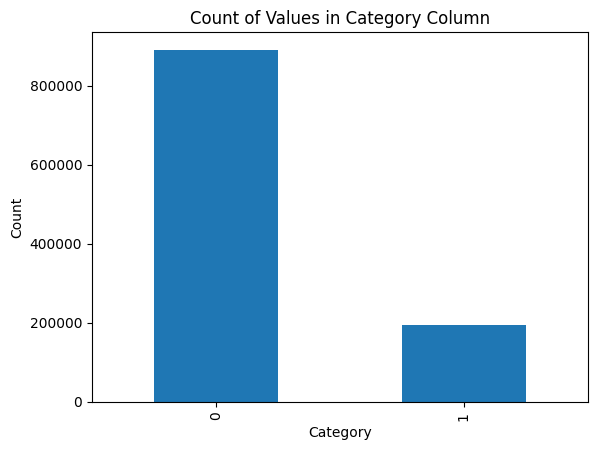

In [190]:
value_counts = data['fraud'].value_counts()

# Plotting dengan Pandas
value_counts.plot(kind='bar')

# Menambahkan judul dan label sumbu
plt.title('Count of Values in Category Column')
plt.xlabel('Category')
plt.ylabel('Count')

# Menampilkan plot
plt.show()

# Preprocessing Data

In [191]:

#Replacing -1 with NaN
mask = (data == -1).any(axis=0)
# Filtering the DataFrame to show only columns with -1
for col in mask:
    data.loc[:, mask] = data.loc[:, mask].replace(-1, np.nan)




## Handling the Missing Value

In [192]:
data.isna().sum()

id                                   0
income                           77366
email_similarity                 20934
address_months_count            810672
current_address_months_count      4039
age                              48639
days_request                     97337
initial_amount                  152651
payment                         102435
zip_count                        58901
app_6h                           59467
app_24h                         152209
app_4w                           47017
total_app_8w                     40808
distinct_birth_emails           112834
employment                       29759
credit_score                     88505
email_status                     50165
housing                          90344
phone_status                     68552
mobile_status                    66665
bank_months                     413016
other_cards                      23067
credit_limit                     19984
foreign                          67861
source_of_application    

In [118]:
data.head()

,id,income,email_similarity,address_months_count,current_address_months_count,age,days_request,initial_amount,payment,zip_count,...,credit_limit,foreign,source_of_application,session_length,os,keep_alive,distinct_device_emails,device_fraud,month_of_application,fraud
0,313601,0.8,0.728457,NaN,80.0,40.0,0.004258,-1.080257,AC,834.0,...,1000.0,0.0,INTERNET,3.596101,windows,NaN,1.0,0.0,4.0,1
1,461778,0.5,0.858082,NaN,272.0,30.0,0.018662,NaN,NaN,1296.0,...,1000.0,0.0,INTERNET,6.151814,other,0.0,1.0,0.0,NaN,0
2,262345,0.9,0.814606,NaN,121.0,40.0,0.006578,-1.403771,NaN,1471.0,...,1000.0,0.0,INTERNET,4.135402,other,1.0,1.0,0.0,0.0,1
3,229088,0.8,0.730362,NaN,40.0,20.0,0.016866,-1.225565,NaN,3281.0,...,200.0,0.0,INTERNET,3.394497,windows,0.0,1.0,0.0,0.0,0
4,559991,0.1,0.032931,NaN,194.0,50.0,0.020789,NaN,AB,1493.0,...,990.0,0.0,INTERNET,4.737753,windows,1.0,1.0,0.0,2.0,1


In [193]:
categoric = list(data.select_dtypes(include=['object']).columns)
categoric_encode = ["email_status","foreign","mobile_status", "other_cards", "phone_status", "month_of_application", "keep_alive"]
numerik = [item for item in list(data.columns) if item not in set(categoric+categoric_encode+["id", "fraud"])]

In [194]:
for i in categoric:
    data[i].fillna(data[i].mode()[0], inplace=True)
for i in categoric_encode:
    data[i].fillna(data[i].mode()[0], inplace=True)
for i in numerik:
    data[i].fillna(data[i].mean(), inplace=True)

In [195]:
data.isna().sum()

id                              0
income                          0
email_similarity                0
address_months_count            0
current_address_months_count    0
age                             0
days_request                    0
initial_amount                  0
payment                         0
zip_count                       0
app_6h                          0
app_24h                         0
app_4w                          0
total_app_8w                    0
distinct_birth_emails           0
employment                      0
credit_score                    0
email_status                    0
housing                         0
phone_status                    0
mobile_status                   0
bank_months                     0
other_cards                     0
credit_limit                    0
foreign                         0
source_of_application           0
session_length                  0
os                              0
keep_alive                      0
distinct_devic

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate, Embedding, Flatten

In [196]:
# Split the data into training and testing sets
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)


In [197]:
train_df

,id,income,email_similarity,address_months_count,current_address_months_count,age,days_request,initial_amount,payment,zip_count,...,credit_limit,foreign,source_of_application,session_length,os,keep_alive,distinct_device_emails,device_fraud,month_of_application,fraud
624833,362745,0.2,0.794717,62.015109,81.0,50.0,0.021271,-0.926188,AB,1960.0,...,1500.0,0.0,INTERNET,7.677214,windows,1.0,1.0,0.0,0.0,1
246741,848270,0.6,0.434979,62.015109,271.0,30.0,0.027265,-1.213159,AB,1130.0,...,200.0,0.0,INTERNET,4.615274,windows,1.0,2.0,0.0,0.0,0
494618,51931,0.9,0.284901,62.015109,19.0,30.0,0.005767,-0.589173,AC,1199.0,...,1000.0,0.0,TELEAPP,4.043581,other,0.0,1.0,0.0,6.0,0
239208,626240,0.3,0.281058,62.015109,52.0,20.0,0.025104,-0.441486,AB,1562.0,...,200.0,0.0,INTERNET,9.885826,linux,1.0,1.0,0.0,3.0,0
470066,223494,0.7,0.509503,183.000000,12.0,20.0,0.012614,7.850067,AC,4752.0,...,1500.0,0.0,INTERNET,7.677214,macintosh,1.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,639685,0.1,0.908064,62.015109,49.0,30.0,0.008170,-1.284672,AB,1183.0,...,200.0,0.0,INTERNET,8.464719,windows,1.0,1.0,0.0,0.0,0
259178,548100,0.2,0.777870,62.015109,19.0,20.0,0.011040,-0.493242,AB,2071.0,...,200.0,0.0,INTERNET,13.597094,windows,0.0,1.0,0.0,2.0,0
131932,272367,0.9,0.211027,62.015109,46.0,40.0,0.013997,-0.076370,AB,2401.0,...,1500.0,0.0,INTERNET,2.665354,windows,0.0,1.0,0.0,2.0,1
671155,954880,0.4,0.086473,62.015109,101.0,30.0,7.386195,-0.826510,AC,1142.0,...,200.0,0.0,INTERNET,5.361898,other,1.0,1.0,0.0,4.0,0


In [198]:
Y_train = train_df["fraud"]
Y_test = test_df["fraud"]

In [199]:
# Preprocess numerical features
scaler = StandardScaler()
train_numerical = pd.DataFrame(scaler.fit_transform(train_df[numerik]), columns = numerik).reset_index(drop=True)
test_numerical = pd.DataFrame(scaler.fit_transform(test_df[numerik]), columns = numerik).reset_index(drop=True)



In [200]:
# Preprocess categorical features
from sklearn.preprocessing import LabelEncoder
train_categorical = train_df[categoric].apply(LabelEncoder().fit_transform).reset_index(drop=True)
test_categorical = test_df[categoric].apply(LabelEncoder().fit_transform).reset_index(drop=True)


In [201]:
# Categorical Encoded features
train_cat_encoded = train_df[categoric_encode].reset_index(drop=True)
test_cat_encoded = test_df[categoric_encode].reset_index(drop=True)

# Classification

## Tensorflow

In [202]:
# Concatenate numerical and categorical features
X_train = pd.concat([train_numerical, train_categorical, train_cat_encoded], axis = 1)
X_test = pd.concat([test_numerical, test_categorical, test_cat_encoded], axis = 1)

In [203]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, Y_train)

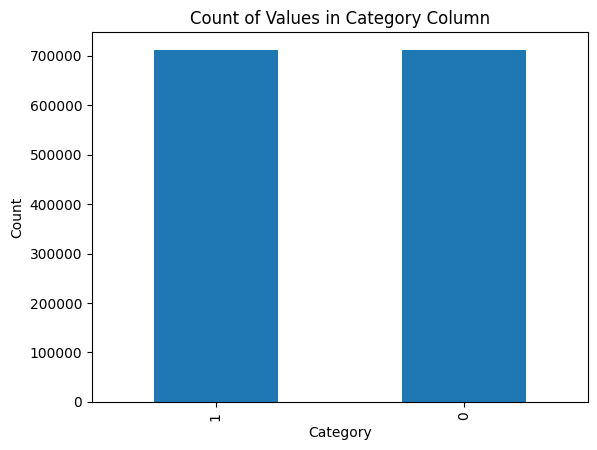

In [205]:
value_counts = y_resampled.value_counts()

# Plotting dengan Pandas
value_counts.plot(kind='bar')

# Menambahkan judul dan label sumbu
plt.title('Count of Values in Category Column')
plt.xlabel('Category')
plt.ylabel('Count')

# Menampilkan plot
plt.show()

In [206]:
X_train1 = X_resampled.to_numpy()
train_target1 = y_resampled.to_numpy()
X_test1 = X_test.to_numpy()
test_target1 = Y_test.to_numpy()

In [207]:
model = tf.keras.Sequential([
    Dense(128, activation='relu', input_shape=(X_train1.shape[1],)),
    Dense(64, activation= 'relu'),
    Dense(32, activation = 'relu'),
    Dense(16, activation = 'relu'),
    Dense(1, activation='sigmoid')
])
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
class MyCallbacks(tf.keras.callbacks.Callback):
        def __init__(self):
            super(MyCallbacks, self).__init__()
            self.threshold = 0.98

        def on_epoch_end(self, epoch, logs=None): 
            val_acc = logs["accuracy"]
            if val_acc >= self.threshold:
                self.model.stop_training = True
# Train the model
model.fit(X_train1, train_target1, epochs=10, batch_size=128, callbacks=[MyCallbacks()])

# Evaluate the model
loss, accuracy = model.evaluate(X_test1, test_target1)
print(f'Test Accuracy: {accuracy:.4f}')


Epoch 1/10


11130/11130 [==============================] - 60s 5ms/step - loss: 0.3978 - accuracy: 0.8189
Epoch 2/10
11130/11130 [==============================] - 48s 4ms/step - loss: 0.3306 - accuracy: 0.8572
Epoch 3/10
11130/11130 [==============================] - 49s 4ms/step - loss: 0.3034 - accuracy: 0.8733
Epoch 4/10
11130/11130 [==============================] - 49s 4ms/step - loss: 0.2882 - accuracy: 0.8819
Epoch 5/10
11130/11130 [==============================] - 52s 5ms/step - loss: 0.2782 - accuracy: 0.8877
Epoch 6/10
11130/11130 [==============================] - 49s 4ms/step - loss: 0.2710 - accuracy: 0.8913
Epoch 7/10
11130/11130 [==============================] - 51s 5ms/step - loss: 0.2649 - accuracy: 0.8948
Epoch 8/10
11130/11130 [==============================] - 52s 5ms/step - loss: 0.2599 - accuracy: 0.8975
Epoch 9/10
11130/11130 [==============================] - 50s 4ms/step - loss: 0.2561 - accuracy: 0.8994
Epoch 10/10
6774/6774 [==============================] - 24s 4ms/s